In [1]:
import os
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns

# Set working directory
os.chdir("P:/Tolulope/Manuscript/Yuan Analysis")

In [2]:
# Load each sample's data one by one
adata1 = sc.read_h5ad("YSham_GFP_adata.h5ad")
adata2 = sc.read_h5ad("YSham_noGFP_adata.h5ad")
adata3 = sc.read_h5ad("YOV_GFP_adata.h5ad")
adata4 = sc.read_h5ad("YOV_noGFP_adata.h5ad")
adata5 = sc.read_h5ad("ASham_GFP_adata.h5ad")
adata6 = sc.read_h5ad("ASham_noGFP_adata.h5ad")
adata7 = sc.read_h5ad("AOV_GFP_adata.h5ad")
adata8 = sc.read_h5ad("AOV_noGFP_adata.h5ad")

In [2]:
import scvi
import scanpy as sc

from matplotlib.pyplot import rc_context
sc.set_figure_params(dpi=100)

import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [4]:
adata1

AnnData object with n_obs × n_vars = 2760 × 55402
    obs: 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [5]:
sc.pp.filter_genes(adata1, min_cells = 10)
sc.pp.highly_variable_genes(adata1, n_top_genes = 3000, subset = True, flavor = 'seurat_v3')

In [6]:
scvi.model.SCVI.setup_anndata(adata1)
vae = scvi.model.SCVI(adata1)
vae.train()


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█████| 400/400 [05:30<00:00,  1.22it/s, v_num=1, train_loss_step=1.06e+3, train_loss_epoch=1.06e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████| 400/400 [05:30<00:00,  1.21it/s, v_num=1, train_loss_step=1.06e+3, train_loss_epoch=1.06e+3]


In [7]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 282/400:  70%|██████▎  | 282/400 [01:49<00:45,  2.58it/s, v_num=1, train_loss_step=0.307, train_loss_epoch=0.248]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.278. Signaling Trainer to stop.


In [8]:
solo.predict()

,doublet,singlet
AAACCCAGTTCCGTTC-1-YSham_GFP,0.756582,0.243418
AAACCCATCCATACTT-1-YSham_GFP,0.629807,0.370193
AAACCCATCCCACAGG-1-YSham_GFP,0.099105,0.900895
AAACGAACATACCACA-1-YSham_GFP,0.293741,0.706259
AAACGAAGTCGTGGTC-1-YSham_GFP,0.125207,0.874793
...,...,...
TTTGGTTGTGACTGTT-1-YSham_GFP,0.004591,0.995409
TTTGGTTGTTTGACAC-1-YSham_GFP,0.424203,0.575797
TTTGTTGCACTCTAGA-1-YSham_GFP,0.060917,0.939083
TTTGTTGTCATTGTTC-1-YSham_GFP,0.375724,0.624276


In [9]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)

df

,doublet,singlet,prediction
AAACCCAGTTCCGTTC-1-YSham_GFP,0.756582,0.243418,doublet
AAACCCATCCATACTT-1-YSham_GFP,0.629807,0.370193,doublet
AAACCCATCCCACAGG-1-YSham_GFP,0.099105,0.900895,singlet
AAACGAACATACCACA-1-YSham_GFP,0.293741,0.706259,singlet
AAACGAAGTCGTGGTC-1-YSham_GFP,0.125207,0.874793,singlet
...,...,...,...
TTTGGTTGTGACTGTT-1-YSham_GFP,0.004591,0.995409,singlet
TTTGGTTGTTTGACAC-1-YSham_GFP,0.424203,0.575797,singlet
TTTGTTGCACTCTAGA-1-YSham_GFP,0.060917,0.939083,singlet
TTTGTTGTCATTGTTC-1-YSham_GFP,0.375724,0.624276,singlet


In [10]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,371,371
singlet,2389,2389


In [11]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
AAACCCAGTTCCGTTC-1-YSham_GFP,0.756582,0.243418,doublet,0.513163
AAACCCATCCATACTT-1-YSham_GFP,0.629807,0.370193,doublet,0.259614
AAACCCATCCCACAGG-1-YSham_GFP,0.099105,0.900895,singlet,-0.801790
AAACGAACATACCACA-1-YSham_GFP,0.293741,0.706259,singlet,-0.412518
AAACGAAGTCGTGGTC-1-YSham_GFP,0.125207,0.874793,singlet,-0.749586
...,...,...,...,...
TTTGGTTGTGACTGTT-1-YSham_GFP,0.004591,0.995409,singlet,-0.990818
TTTGGTTGTTTGACAC-1-YSham_GFP,0.424203,0.575797,singlet,-0.151594
TTTGTTGCACTCTAGA-1-YSham_GFP,0.060917,0.939083,singlet,-0.878166
TTTGTTGTCATTGTTC-1-YSham_GFP,0.375724,0.624276,singlet,-0.248552


In [12]:
import seaborn as sns

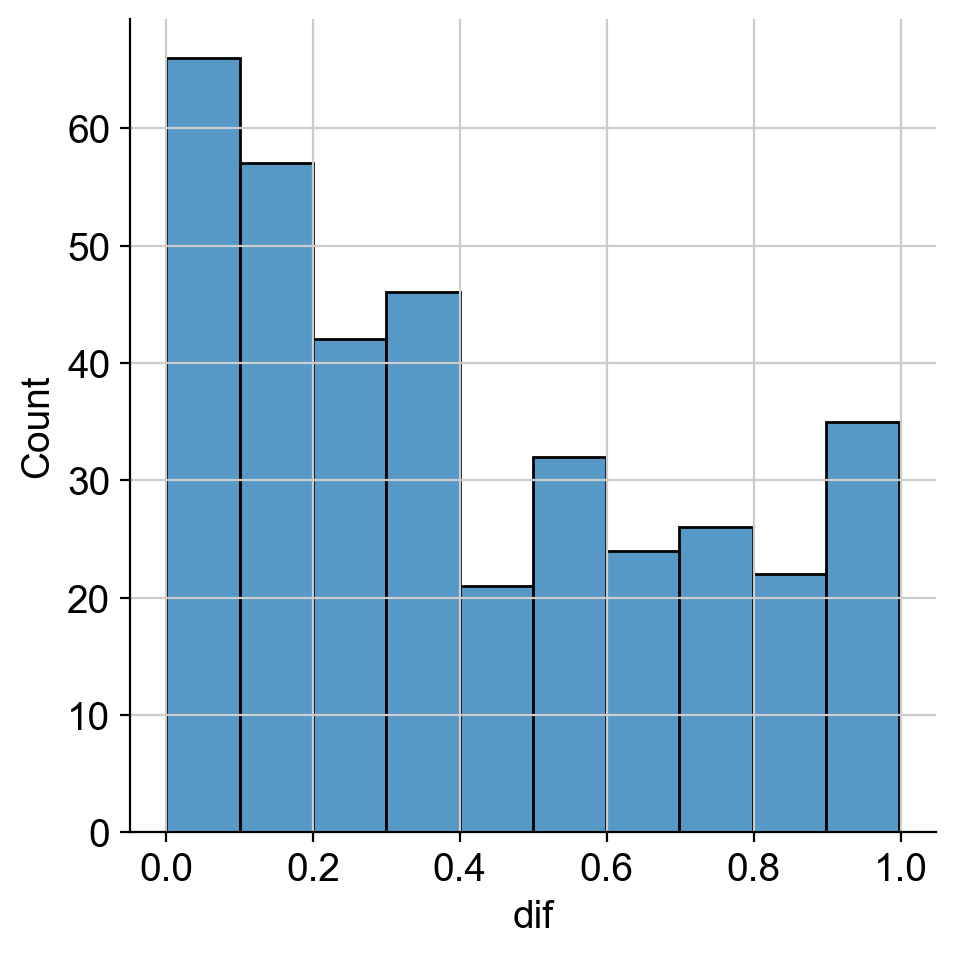

In [13]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [14]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 0.2)]
doublets

,doublet,singlet,prediction,dif
AAACCCAGTTCCGTTC-1-YSham_GFP,0.756582,0.243418,doublet,0.513163
AAACCCATCCATACTT-1-YSham_GFP,0.629807,0.370193,doublet,0.259614
AAACGCTCAGCGAACA-1-YSham_GFP,0.862798,0.137202,doublet,0.725597
AAACGCTTCCGATGTA-1-YSham_GFP,0.609619,0.390381,doublet,0.219238
AAAGTCCAGCTCGGCT-1-YSham_GFP,0.877771,0.122229,doublet,0.755542
...,...,...,...,...
TTGCCTGCATTCGGGC-1-YSham_GFP,0.622453,0.377547,doublet,0.244906
TTGTTGTCAATCGCCG-1-YSham_GFP,0.999170,0.000830,doublet,0.998340
TTTAGTCCAGGTGACA-1-YSham_GFP,0.612423,0.387577,doublet,0.224847
TTTCCTCCACCTTCCA-1-YSham_GFP,0.750293,0.249707,doublet,0.500586


In [15]:
adata1

AnnData object with n_obs × n_vars = 2760 × 3000
    obs: 'batch', '_scvi_batch', '_scvi_labels'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

In [16]:
adata1 = sc.read_h5ad("YSham_GFP_adata.h5ad")

In [17]:
adata1.obs

,batch
AAACCCAGTTCCGTTC-1-YSham_GFP,YSham_GFP
AAACCCATCCATACTT-1-YSham_GFP,YSham_GFP
AAACCCATCCCACAGG-1-YSham_GFP,YSham_GFP
AAACGAACATACCACA-1-YSham_GFP,YSham_GFP
AAACGAAGTCGTGGTC-1-YSham_GFP,YSham_GFP
...,...
TTTGGTTGTGACTGTT-1-YSham_GFP,YSham_GFP
TTTGGTTGTTTGACAC-1-YSham_GFP,YSham_GFP
TTTGTTGCACTCTAGA-1-YSham_GFP,YSham_GFP
TTTGTTGTCATTGTTC-1-YSham_GFP,YSham_GFP


In [18]:
adata1.obs['doublet'] = adata1.obs.index.isin(doublets.index) 

In [19]:
adata1.obs

,batch,doublet
AAACCCAGTTCCGTTC-1-YSham_GFP,YSham_GFP,True
AAACCCATCCATACTT-1-YSham_GFP,YSham_GFP,True
AAACCCATCCCACAGG-1-YSham_GFP,YSham_GFP,False
AAACGAACATACCACA-1-YSham_GFP,YSham_GFP,False
AAACGAAGTCGTGGTC-1-YSham_GFP,YSham_GFP,False
...,...,...
TTTGGTTGTGACTGTT-1-YSham_GFP,YSham_GFP,False
TTTGGTTGTTTGACAC-1-YSham_GFP,YSham_GFP,False
TTTGTTGCACTCTAGA-1-YSham_GFP,YSham_GFP,False
TTTGTTGTCATTGTTC-1-YSham_GFP,YSham_GFP,False


In [20]:
adata1 = adata1[~adata1.obs.doublet]

In [21]:
# Save the filtered AnnData object
adata1.write("YSham_GFP_adata_filtered_with_SOLO.h5ad")

In [22]:
adata1

View of AnnData object with n_obs × n_vars = 2512 × 55402
    obs: 'batch', 'doublet'
    var: 'gene_ids', 'feature_types', 'genome'

In [22]:
#sample 2

In [23]:
adata2

AnnData object with n_obs × n_vars = 8197 × 55402
    obs: 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [24]:
sc.pp.filter_genes(adata2, min_cells = 10)
adata2

AnnData object with n_obs × n_vars = 8197 × 21409
    obs: 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [25]:
sc.pp.highly_variable_genes(adata2, n_top_genes = 3000, subset = True, flavor = 'seurat_v3')

In [26]:
scvi.model.SCVI.setup_anndata(adata2)
vae = scvi.model.SCVI(adata2)
vae.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█████████████| 400/400 [15:42<00:00,  2.28s/it, v_num=1, train_loss_step=810, train_loss_epoch=760]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████████| 400/400 [15:42<00:00,  2.36s/it, v_num=1, train_loss_step=810, train_loss_epoch=760]


In [27]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 231/400:  58%|█████▏   | 231/400 [05:37<04:06,  1.46s/it, v_num=1, train_loss_step=0.292, train_loss_epoch=0.264]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.248. Signaling Trainer to stop.


In [28]:
solo.predict()

,doublet,singlet
AAACCCAAGCTTCATG-1-YSham_noGFP,0.015291,0.984709
AAACCCACAGAGTCAG-1-YSham_noGFP,0.004562,0.995438
AAACCCAGTAAGATCA-1-YSham_noGFP,0.093517,0.906483
AAACCCAGTGGCTGCT-1-YSham_noGFP,0.015361,0.984639
AAACCCAGTTGGTAGG-1-YSham_noGFP,0.432460,0.567540
...,...,...
TTTGTTGGTTCAAAGA-1-YSham_noGFP,0.532571,0.467429
TTTGTTGGTTGTCATG-1-YSham_noGFP,0.021572,0.978428
TTTGTTGTCAGAGTTC-1-YSham_noGFP,0.029953,0.970047
TTTGTTGTCCGCACGA-1-YSham_noGFP,0.436430,0.563570


In [29]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)
df

,doublet,singlet,prediction
AAACCCAAGCTTCATG-1-YSham_noGFP,0.015291,0.984709,singlet
AAACCCACAGAGTCAG-1-YSham_noGFP,0.004562,0.995438,singlet
AAACCCAGTAAGATCA-1-YSham_noGFP,0.093517,0.906483,singlet
AAACCCAGTGGCTGCT-1-YSham_noGFP,0.015361,0.984639,singlet
AAACCCAGTTGGTAGG-1-YSham_noGFP,0.432460,0.567540,singlet
...,...,...,...
TTTGTTGGTTCAAAGA-1-YSham_noGFP,0.532571,0.467429,doublet
TTTGTTGGTTGTCATG-1-YSham_noGFP,0.021572,0.978428,singlet
TTTGTTGTCAGAGTTC-1-YSham_noGFP,0.029953,0.970047,singlet
TTTGTTGTCCGCACGA-1-YSham_noGFP,0.436430,0.563570,singlet


In [30]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,892,892
singlet,7305,7305


In [31]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
AAACCCAAGCTTCATG-1-YSham_noGFP,0.015291,0.984709,singlet,-0.969417
AAACCCACAGAGTCAG-1-YSham_noGFP,0.004562,0.995438,singlet,-0.990876
AAACCCAGTAAGATCA-1-YSham_noGFP,0.093517,0.906483,singlet,-0.812966
AAACCCAGTGGCTGCT-1-YSham_noGFP,0.015361,0.984639,singlet,-0.969277
AAACCCAGTTGGTAGG-1-YSham_noGFP,0.432460,0.567540,singlet,-0.135081
...,...,...,...,...
TTTGTTGGTTCAAAGA-1-YSham_noGFP,0.532571,0.467429,doublet,0.065141
TTTGTTGGTTGTCATG-1-YSham_noGFP,0.021572,0.978428,singlet,-0.956856
TTTGTTGTCAGAGTTC-1-YSham_noGFP,0.029953,0.970047,singlet,-0.940094
TTTGTTGTCCGCACGA-1-YSham_noGFP,0.436430,0.563570,singlet,-0.127140


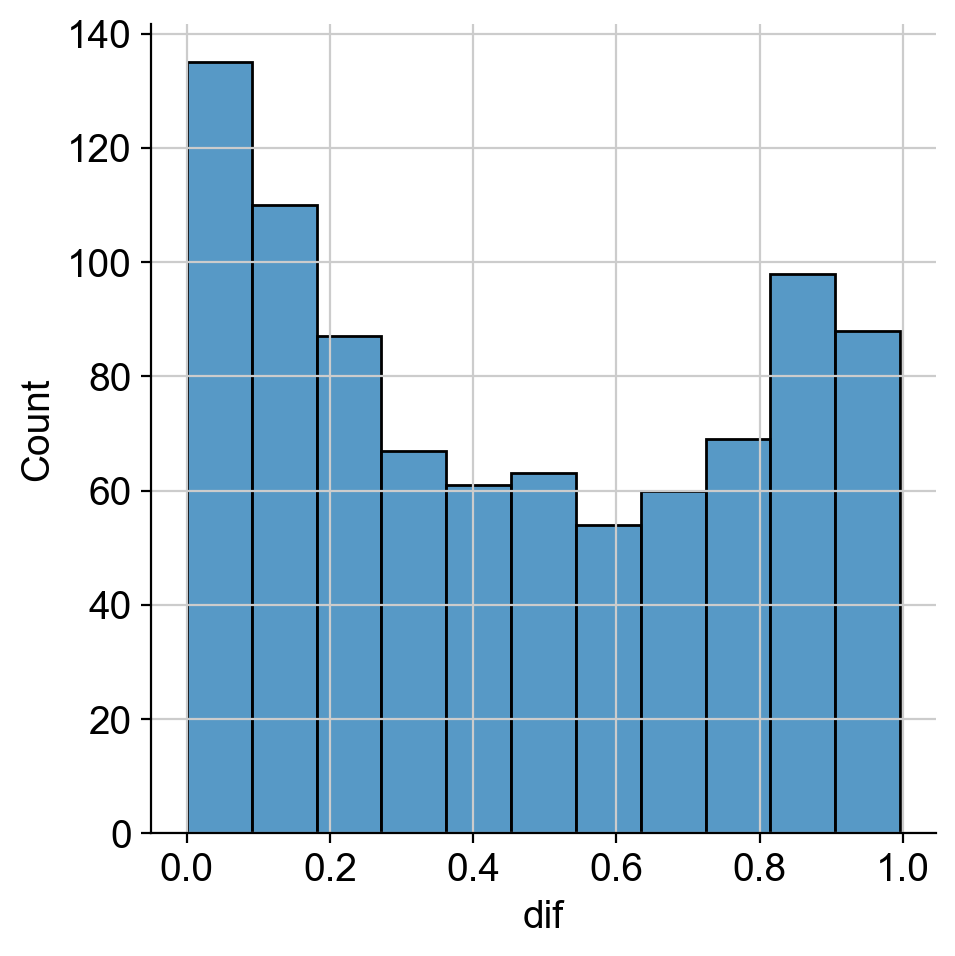

In [32]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [33]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 0.2)]
doublets

,doublet,singlet,prediction,dif
AAACGAAGTCACAGAG-1-YSham_noGFP,0.980101,0.019899,doublet,0.960201
AAAGAACAGTCATGAA-1-YSham_noGFP,0.966185,0.033815,doublet,0.932370
AAAGGTACAACCAACT-1-YSham_noGFP,0.831793,0.168207,doublet,0.663586
AAATGGAGTCACCACG-1-YSham_noGFP,0.767230,0.232770,doublet,0.534460
AACAAAGTCAGCCTTC-1-YSham_noGFP,0.989189,0.010811,doublet,0.978377
...,...,...,...,...
TTTGATCTCAGTCCGG-1-YSham_noGFP,0.839175,0.160825,doublet,0.678350
TTTGGAGCAAGGTCGA-1-YSham_noGFP,0.866263,0.133737,doublet,0.732526
TTTGGTTGTGATTGGG-1-YSham_noGFP,0.981843,0.018157,doublet,0.963687
TTTGGTTTCTATCACT-1-YSham_noGFP,0.642369,0.357631,doublet,0.284738


In [34]:
adata2

AnnData object with n_obs × n_vars = 8197 × 3000
    obs: 'batch', '_scvi_batch', '_scvi_labels'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

In [35]:
adata2 = sc.read_h5ad("YSham_noGFP_adata.h5ad")

In [36]:
adata2.obs

,batch
AAACCCAAGCTTCATG-1-YSham_noGFP,YSham_noGFP
AAACCCACAGAGTCAG-1-YSham_noGFP,YSham_noGFP
AAACCCAGTAAGATCA-1-YSham_noGFP,YSham_noGFP
AAACCCAGTGGCTGCT-1-YSham_noGFP,YSham_noGFP
AAACCCAGTTGGTAGG-1-YSham_noGFP,YSham_noGFP
...,...
TTTGTTGGTTCAAAGA-1-YSham_noGFP,YSham_noGFP
TTTGTTGGTTGTCATG-1-YSham_noGFP,YSham_noGFP
TTTGTTGTCAGAGTTC-1-YSham_noGFP,YSham_noGFP
TTTGTTGTCCGCACGA-1-YSham_noGFP,YSham_noGFP


In [37]:
adata2.obs['doublet'] = adata2.obs.index.isin(doublets.index) 

In [38]:
adata2.obs

,batch,doublet
AAACCCAAGCTTCATG-1-YSham_noGFP,YSham_noGFP,False
AAACCCACAGAGTCAG-1-YSham_noGFP,YSham_noGFP,False
AAACCCAGTAAGATCA-1-YSham_noGFP,YSham_noGFP,False
AAACCCAGTGGCTGCT-1-YSham_noGFP,YSham_noGFP,False
AAACCCAGTTGGTAGG-1-YSham_noGFP,YSham_noGFP,False
...,...,...
TTTGTTGGTTCAAAGA-1-YSham_noGFP,YSham_noGFP,False
TTTGTTGGTTGTCATG-1-YSham_noGFP,YSham_noGFP,False
TTTGTTGTCAGAGTTC-1-YSham_noGFP,YSham_noGFP,False
TTTGTTGTCCGCACGA-1-YSham_noGFP,YSham_noGFP,False


In [39]:
adata2 = adata2[~adata2.obs.doublet]
adata2

View of AnnData object with n_obs × n_vars = 7577 × 55402
    obs: 'batch', 'doublet'
    var: 'gene_ids', 'feature_types', 'genome'

In [40]:
# Save the filtered AnnData object
adata2.write("YSham_noGFP_adata_filtered_with_SOLO.h5ad")
adata2

View of AnnData object with n_obs × n_vars = 7577 × 55402
    obs: 'batch', 'doublet'
    var: 'gene_ids', 'feature_types', 'genome'

In [40]:
#sample 3

In [41]:
adata3

AnnData object with n_obs × n_vars = 5164 × 55402
    obs: 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [42]:
sc.pp.filter_genes(adata3, min_cells = 10)
adata3

AnnData object with n_obs × n_vars = 5164 × 22949
    obs: 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [43]:
sc.pp.highly_variable_genes(adata3, n_top_genes = 3000, subset = True, flavor = 'seurat_v3')

In [44]:
scvi.model.SCVI.setup_anndata(adata3)
vae = scvi.model.SCVI(adata3)
vae.train()


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█████| 400/400 [11:18<00:00,  1.69s/it, v_num=1, train_loss_step=1.05e+3, train_loss_epoch=1.07e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████| 400/400 [11:18<00:00,  1.70s/it, v_num=1, train_loss_step=1.05e+3, train_loss_epoch=1.07e+3]


In [45]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 252/400:  63%|█████▋   | 252/400 [04:03<02:22,  1.04it/s, v_num=1, train_loss_step=0.362, train_loss_epoch=0.332]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.320. Signaling Trainer to stop.


In [46]:
solo.predict()

,doublet,singlet
AAACCCAAGTACAGAT-1-YOV_GFP,0.372337,0.627663
AAACCCAAGTGGAATT-1-YOV_GFP,0.275313,0.724687
AAACCCACAAGAGGCT-1-YOV_GFP,0.874850,0.125150
AAACCCACAGGTACGA-1-YOV_GFP,0.021288,0.978712
AAACCCAGTTCGGCCA-1-YOV_GFP,0.352475,0.647525
...,...,...
TTTGGTTTCCCGGTAG-1-YOV_GFP,0.230435,0.769565
TTTGTTGAGATACAGT-1-YOV_GFP,0.151824,0.848176
TTTGTTGAGTCGAGGT-1-YOV_GFP,0.350064,0.649936
TTTGTTGTCAAACGTC-1-YOV_GFP,0.203525,0.796475


In [47]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)
df

,doublet,singlet,prediction
AAACCCAAGTACAGAT-1-YOV_GFP,0.372337,0.627663,singlet
AAACCCAAGTGGAATT-1-YOV_GFP,0.275313,0.724687,singlet
AAACCCACAAGAGGCT-1-YOV_GFP,0.874850,0.125150,doublet
AAACCCACAGGTACGA-1-YOV_GFP,0.021288,0.978712,singlet
AAACCCAGTTCGGCCA-1-YOV_GFP,0.352475,0.647525,singlet
...,...,...,...
TTTGGTTTCCCGGTAG-1-YOV_GFP,0.230435,0.769565,singlet
TTTGTTGAGATACAGT-1-YOV_GFP,0.151824,0.848176,singlet
TTTGTTGAGTCGAGGT-1-YOV_GFP,0.350064,0.649936,singlet
TTTGTTGTCAAACGTC-1-YOV_GFP,0.203525,0.796475,singlet


In [48]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,861,861
singlet,4303,4303


In [49]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
AAACCCAAGTACAGAT-1-YOV_GFP,0.372337,0.627663,singlet,-0.255325
AAACCCAAGTGGAATT-1-YOV_GFP,0.275313,0.724687,singlet,-0.449374
AAACCCACAAGAGGCT-1-YOV_GFP,0.874850,0.125150,doublet,0.749701
AAACCCACAGGTACGA-1-YOV_GFP,0.021288,0.978712,singlet,-0.957424
AAACCCAGTTCGGCCA-1-YOV_GFP,0.352475,0.647525,singlet,-0.295050
...,...,...,...,...
TTTGGTTTCCCGGTAG-1-YOV_GFP,0.230435,0.769565,singlet,-0.539129
TTTGTTGAGATACAGT-1-YOV_GFP,0.151824,0.848176,singlet,-0.696352
TTTGTTGAGTCGAGGT-1-YOV_GFP,0.350064,0.649936,singlet,-0.299872
TTTGTTGTCAAACGTC-1-YOV_GFP,0.203525,0.796475,singlet,-0.592951


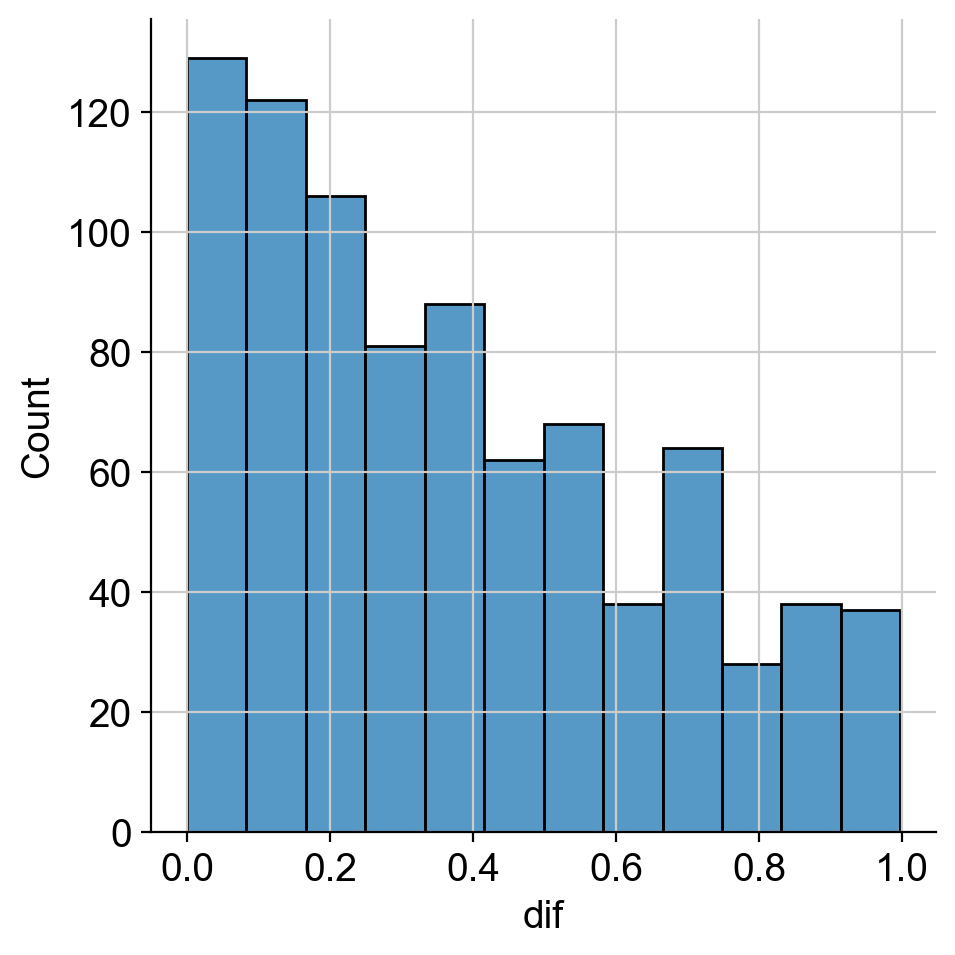

In [50]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [51]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 0.2)]
doublets

,doublet,singlet,prediction,dif
AAACCCACAAGAGGCT-1-YOV_GFP,0.874850,0.125150,doublet,0.749701
AAAGAACCAAAGGAGA-1-YOV_GFP,0.633254,0.366746,doublet,0.266508
AACAAAGAGAGAGCAA-1-YOV_GFP,0.677397,0.322603,doublet,0.354795
AACAACCTCCCAATAG-1-YOV_GFP,0.783006,0.216994,doublet,0.566013
AACACACCAAATCGTC-1-YOV_GFP,0.897071,0.102929,doublet,0.794142
...,...,...,...,...
TTTACGTCATCAGCTA-1-YOV_GFP,0.622882,0.377118,doublet,0.245763
TTTACTGTCTAGACAC-1-YOV_GFP,0.988848,0.011152,doublet,0.977696
TTTCAGTCACAGTATC-1-YOV_GFP,0.619995,0.380005,doublet,0.239989
TTTCATGCATGAGGGT-1-YOV_GFP,0.854864,0.145136,doublet,0.709728


In [52]:
adata3

AnnData object with n_obs × n_vars = 5164 × 3000
    obs: 'batch', '_scvi_batch', '_scvi_labels'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

In [53]:
adata3 = sc.read_h5ad("YOV_GFP_adata.h5ad")


In [54]:
adata3.obs

,batch
AAACCCAAGTACAGAT-1-YOV_GFP,YOV_GFP
AAACCCAAGTGGAATT-1-YOV_GFP,YOV_GFP
AAACCCACAAGAGGCT-1-YOV_GFP,YOV_GFP
AAACCCACAGGTACGA-1-YOV_GFP,YOV_GFP
AAACCCAGTTCGGCCA-1-YOV_GFP,YOV_GFP
...,...
TTTGGTTTCCCGGTAG-1-YOV_GFP,YOV_GFP
TTTGTTGAGATACAGT-1-YOV_GFP,YOV_GFP
TTTGTTGAGTCGAGGT-1-YOV_GFP,YOV_GFP
TTTGTTGTCAAACGTC-1-YOV_GFP,YOV_GFP


In [55]:
adata3.obs['doublet'] = adata3.obs.index.isin(doublets.index) 

In [56]:
adata3.obs

,batch,doublet
AAACCCAAGTACAGAT-1-YOV_GFP,YOV_GFP,False
AAACCCAAGTGGAATT-1-YOV_GFP,YOV_GFP,False
AAACCCACAAGAGGCT-1-YOV_GFP,YOV_GFP,True
AAACCCACAGGTACGA-1-YOV_GFP,YOV_GFP,False
AAACCCAGTTCGGCCA-1-YOV_GFP,YOV_GFP,False
...,...,...
TTTGGTTTCCCGGTAG-1-YOV_GFP,YOV_GFP,False
TTTGTTGAGATACAGT-1-YOV_GFP,YOV_GFP,False
TTTGTTGAGTCGAGGT-1-YOV_GFP,YOV_GFP,False
TTTGTTGTCAAACGTC-1-YOV_GFP,YOV_GFP,False


In [57]:
adata3 = adata3[~adata3.obs.doublet]
adata3

View of AnnData object with n_obs × n_vars = 4599 × 55402
    obs: 'batch', 'doublet'
    var: 'gene_ids', 'feature_types', 'genome'

In [58]:
# Save the filtered AnnData object
adata3.write("YOV_GFP_adata_filtered_with_SOLO.h5ad")
adata3

View of AnnData object with n_obs × n_vars = 4599 × 55402
    obs: 'batch', 'doublet'
    var: 'gene_ids', 'feature_types', 'genome'

In [58]:
#sample 4

In [59]:
adata4

AnnData object with n_obs × n_vars = 8843 × 55402
    obs: 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [60]:
sc.pp.filter_genes(adata4, min_cells = 10)
adata4

AnnData object with n_obs × n_vars = 8843 × 25092
    obs: 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [61]:
sc.pp.highly_variable_genes(adata4, n_top_genes = 3000, subset = True, flavor = 'seurat_v3')

In [62]:
scvi.model.SCVI.setup_anndata(adata4)
vae = scvi.model.SCVI(adata4)
vae.train()


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█████████████| 400/400 [18:25<00:00,  2.64s/it, v_num=1, train_loss_step=615, train_loss_epoch=909]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████████| 400/400 [18:25<00:00,  2.76s/it, v_num=1, train_loss_step=615, train_loss_epoch=909]


In [63]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 187/400:  47%|████▏    | 187/400 [05:00<05:42,  1.61s/it, v_num=1, train_loss_step=0.339, train_loss_epoch=0.305]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.297. Signaling Trainer to stop.


In [64]:
solo.predict()

,doublet,singlet
AAACCCAAGATGGTAT-1-YOV_noGFP,0.372940,0.627060
AAACCCAAGGATGCGT-1-YOV_noGFP,0.044754,0.955246
AAACCCACACCGCTAG-1-YOV_noGFP,0.168486,0.831514
AAACCCACATGACGGA-1-YOV_noGFP,0.178421,0.821579
AAACCCATCATCACCC-1-YOV_noGFP,0.006598,0.993402
...,...,...
TTTGTTGAGTGTAGTA-1-YOV_noGFP,0.031320,0.968680
TTTGTTGCACCGAATT-1-YOV_noGFP,0.295311,0.704689
TTTGTTGCATCCTTCG-1-YOV_noGFP,0.095347,0.904653
TTTGTTGGTCAGGAGT-1-YOV_noGFP,0.118938,0.881062


In [65]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)
df

,doublet,singlet,prediction
AAACCCAAGATGGTAT-1-YOV_noGFP,0.372940,0.627060,singlet
AAACCCAAGGATGCGT-1-YOV_noGFP,0.044754,0.955246,singlet
AAACCCACACCGCTAG-1-YOV_noGFP,0.168486,0.831514,singlet
AAACCCACATGACGGA-1-YOV_noGFP,0.178421,0.821579,singlet
AAACCCATCATCACCC-1-YOV_noGFP,0.006598,0.993402,singlet
...,...,...,...
TTTGTTGAGTGTAGTA-1-YOV_noGFP,0.031320,0.968680,singlet
TTTGTTGCACCGAATT-1-YOV_noGFP,0.295311,0.704689,singlet
TTTGTTGCATCCTTCG-1-YOV_noGFP,0.095347,0.904653,singlet
TTTGTTGGTCAGGAGT-1-YOV_noGFP,0.118938,0.881062,singlet


In [66]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,1912,1912
singlet,6931,6931


In [67]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
AAACCCAAGATGGTAT-1-YOV_noGFP,0.372940,0.627060,singlet,-0.254119
AAACCCAAGGATGCGT-1-YOV_noGFP,0.044754,0.955246,singlet,-0.910491
AAACCCACACCGCTAG-1-YOV_noGFP,0.168486,0.831514,singlet,-0.663027
AAACCCACATGACGGA-1-YOV_noGFP,0.178421,0.821579,singlet,-0.643158
AAACCCATCATCACCC-1-YOV_noGFP,0.006598,0.993402,singlet,-0.986804
...,...,...,...,...
TTTGTTGAGTGTAGTA-1-YOV_noGFP,0.031320,0.968680,singlet,-0.937360
TTTGTTGCACCGAATT-1-YOV_noGFP,0.295311,0.704689,singlet,-0.409378
TTTGTTGCATCCTTCG-1-YOV_noGFP,0.095347,0.904653,singlet,-0.809306
TTTGTTGGTCAGGAGT-1-YOV_noGFP,0.118938,0.881062,singlet,-0.762124


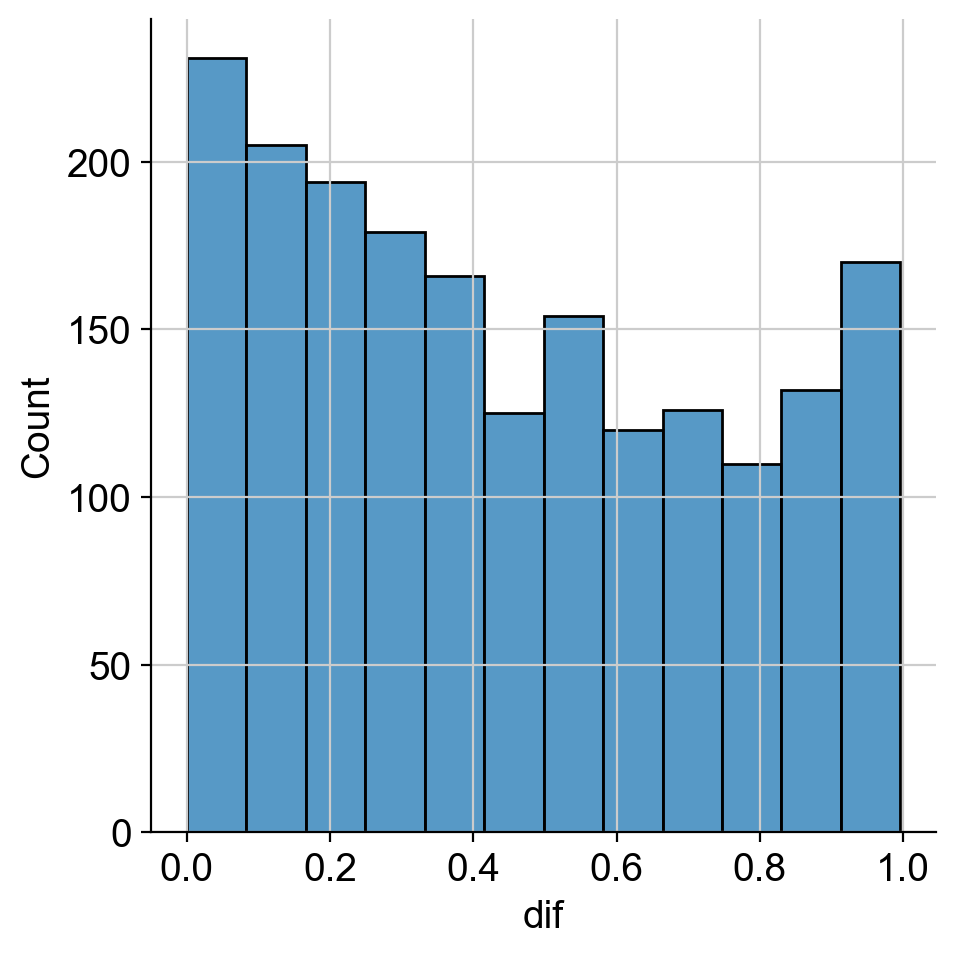

In [68]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [69]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 0.2)]
doublets

,doublet,singlet,prediction,dif
AAACGCTAGAGTATAC-1-YOV_noGFP,0.661143,0.338857,doublet,0.322286
AAAGGATCAAACCATC-1-YOV_noGFP,0.624158,0.375842,doublet,0.248316
AAAGGATCAAGTCCCG-1-YOV_noGFP,0.927769,0.072231,doublet,0.855538
AAAGGGCGTAGCGAGT-1-YOV_noGFP,0.767688,0.232312,doublet,0.535376
AAAGGGCGTCCCACGA-1-YOV_noGFP,0.701741,0.298259,doublet,0.403481
...,...,...,...,...
TTTGACTGTGGAAATT-1-YOV_noGFP,0.662872,0.337128,doublet,0.325745
TTTGATCCATCGATGT-1-YOV_noGFP,0.741234,0.258766,doublet,0.482467
TTTGATCGTCAGATTC-1-YOV_noGFP,0.677374,0.322626,doublet,0.354749
TTTGGTTGTCCAGCAC-1-YOV_noGFP,0.603425,0.396575,doublet,0.206850


In [70]:
adata4

AnnData object with n_obs × n_vars = 8843 × 3000
    obs: 'batch', '_scvi_batch', '_scvi_labels'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

In [71]:

adata4 = sc.read_h5ad("YOV_noGFP_adata.h5ad")

In [72]:
adata4.obs

,batch
AAACCCAAGATGGTAT-1-YOV_noGFP,YOV_noGFP
AAACCCAAGGATGCGT-1-YOV_noGFP,YOV_noGFP
AAACCCACACCGCTAG-1-YOV_noGFP,YOV_noGFP
AAACCCACATGACGGA-1-YOV_noGFP,YOV_noGFP
AAACCCATCATCACCC-1-YOV_noGFP,YOV_noGFP
...,...
TTTGTTGAGTGTAGTA-1-YOV_noGFP,YOV_noGFP
TTTGTTGCACCGAATT-1-YOV_noGFP,YOV_noGFP
TTTGTTGCATCCTTCG-1-YOV_noGFP,YOV_noGFP
TTTGTTGGTCAGGAGT-1-YOV_noGFP,YOV_noGFP


In [73]:
adata4.obs['doublet'] = adata4.obs.index.isin(doublets.index) 

In [74]:
adata4.obs

,batch,doublet
AAACCCAAGATGGTAT-1-YOV_noGFP,YOV_noGFP,False
AAACCCAAGGATGCGT-1-YOV_noGFP,YOV_noGFP,False
AAACCCACACCGCTAG-1-YOV_noGFP,YOV_noGFP,False
AAACCCACATGACGGA-1-YOV_noGFP,YOV_noGFP,False
AAACCCATCATCACCC-1-YOV_noGFP,YOV_noGFP,False
...,...,...
TTTGTTGAGTGTAGTA-1-YOV_noGFP,YOV_noGFP,False
TTTGTTGCACCGAATT-1-YOV_noGFP,YOV_noGFP,False
TTTGTTGCATCCTTCG-1-YOV_noGFP,YOV_noGFP,False
TTTGTTGGTCAGGAGT-1-YOV_noGFP,YOV_noGFP,False


In [75]:
adata4 = adata4[~adata4.obs.doublet]
adata4

View of AnnData object with n_obs × n_vars = 7449 × 55402
    obs: 'batch', 'doublet'
    var: 'gene_ids', 'feature_types', 'genome'

In [76]:
# Save the filtered AnnData object
adata4.write("YOV_noGFP_adata_filtered_with_SOLO.h5ad")
adata4

View of AnnData object with n_obs × n_vars = 7449 × 55402
    obs: 'batch', 'doublet'
    var: 'gene_ids', 'feature_types', 'genome'

In [76]:
#SAMPLE5

In [77]:
adata5

AnnData object with n_obs × n_vars = 2369 × 55402
    obs: 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [78]:
sc.pp.filter_genes(adata5, min_cells = 10)
sc.pp.highly_variable_genes(adata5, n_top_genes = 3000, subset = True, flavor = 'seurat_v3')

In [79]:
scvi.model.SCVI.setup_anndata(adata5)
vae = scvi.model.SCVI(adata5)
vae.train()


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█████████████| 400/400 [04:36<00:00,  1.49it/s, v_num=1, train_loss_step=928, train_loss_epoch=914]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████████| 400/400 [04:36<00:00,  1.45it/s, v_num=1, train_loss_step=928, train_loss_epoch=914]


In [80]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█████████| 400/400 [02:46<00:00,  2.08it/s, v_num=1, train_loss_step=0.398, train_loss_epoch=0.283]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████| 400/400 [02:46<00:00,  2.41it/s, v_num=1, train_loss_step=0.398, train_loss_epoch=0.283]


In [81]:
solo.predict()

,doublet,singlet
AAACCCACAACTCGTA-1-ASham_GFP,0.605827,0.394173
AAACCCAGTAGATGTA-1-ASham_GFP,0.001632,0.998368
AAACCCATCACCATGA-1-ASham_GFP,0.660724,0.339276
AAACGAAAGAATCCCT-1-ASham_GFP,0.199236,0.800765
AAACGAAAGGGACTGT-1-ASham_GFP,0.193139,0.806861
...,...,...
TTTGATCCATAACAGA-1-ASham_GFP,0.012282,0.987718
TTTGATCGTGTATACC-1-ASham_GFP,0.231828,0.768172
TTTGTTGAGACGCCCT-1-ASham_GFP,0.497970,0.502030
TTTGTTGAGGCCTAGA-1-ASham_GFP,0.953781,0.046219


In [82]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)

df

,doublet,singlet,prediction
AAACCCACAACTCGTA-1-ASham_GFP,0.605827,0.394173,doublet
AAACCCAGTAGATGTA-1-ASham_GFP,0.001632,0.998368,singlet
AAACCCATCACCATGA-1-ASham_GFP,0.660724,0.339276,doublet
AAACGAAAGAATCCCT-1-ASham_GFP,0.199236,0.800765,singlet
AAACGAAAGGGACTGT-1-ASham_GFP,0.193139,0.806861,singlet
...,...,...,...
TTTGATCCATAACAGA-1-ASham_GFP,0.012282,0.987718,singlet
TTTGATCGTGTATACC-1-ASham_GFP,0.231828,0.768172,singlet
TTTGTTGAGACGCCCT-1-ASham_GFP,0.497970,0.502030,singlet
TTTGTTGAGGCCTAGA-1-ASham_GFP,0.953781,0.046219,doublet


In [83]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,370,370
singlet,1999,1999


In [84]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
AAACCCACAACTCGTA-1-ASham_GFP,0.605827,0.394173,doublet,0.211654
AAACCCAGTAGATGTA-1-ASham_GFP,0.001632,0.998368,singlet,-0.996736
AAACCCATCACCATGA-1-ASham_GFP,0.660724,0.339276,doublet,0.321448
AAACGAAAGAATCCCT-1-ASham_GFP,0.199236,0.800765,singlet,-0.601529
AAACGAAAGGGACTGT-1-ASham_GFP,0.193139,0.806861,singlet,-0.613722
...,...,...,...,...
TTTGATCCATAACAGA-1-ASham_GFP,0.012282,0.987718,singlet,-0.975435
TTTGATCGTGTATACC-1-ASham_GFP,0.231828,0.768172,singlet,-0.536345
TTTGTTGAGACGCCCT-1-ASham_GFP,0.497970,0.502030,singlet,-0.004061
TTTGTTGAGGCCTAGA-1-ASham_GFP,0.953781,0.046219,doublet,0.907562


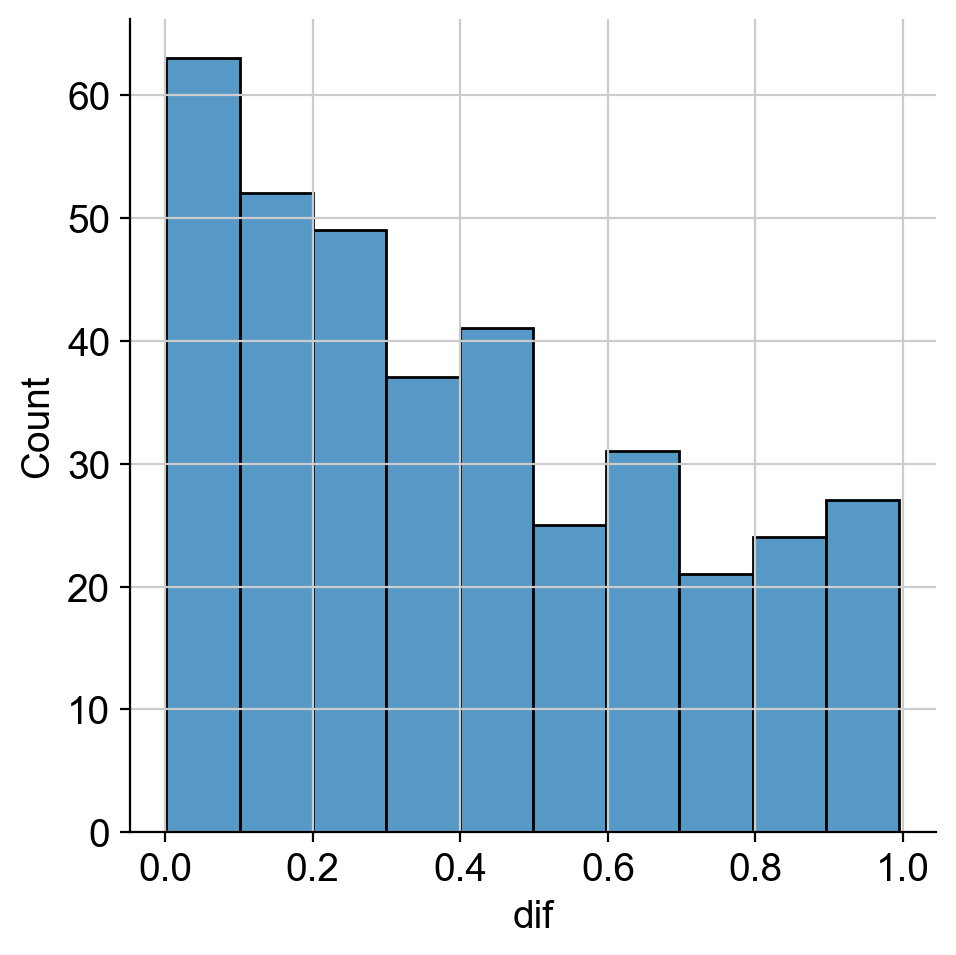

In [85]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [86]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 0.2)]
doublets

,doublet,singlet,prediction,dif
AAACCCACAACTCGTA-1-ASham_GFP,0.605827,0.394173,doublet,0.211654
AAACCCATCACCATGA-1-ASham_GFP,0.660724,0.339276,doublet,0.321448
AAACGCTTCATCACTT-1-ASham_GFP,0.660155,0.339845,doublet,0.320310
AAAGGTATCTTGTTAC-1-ASham_GFP,0.706003,0.293997,doublet,0.412005
AAAGTCCAGGCTTAAA-1-ASham_GFP,0.638439,0.361561,doublet,0.276879
...,...,...,...,...
TTGGGCGGTAGCGATG-1-ASham_GFP,0.619404,0.380596,doublet,0.238808
TTTCACACAGTCTACA-1-ASham_GFP,0.646186,0.353814,doublet,0.292373
TTTCACATCGCTGTCT-1-ASham_GFP,0.670914,0.329086,doublet,0.341828
TTTCGATTCACTACGA-1-ASham_GFP,0.694670,0.305330,doublet,0.389341


In [87]:
adata5

AnnData object with n_obs × n_vars = 2369 × 3000
    obs: 'batch', '_scvi_batch', '_scvi_labels'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

In [88]:
adata5 = sc.read_h5ad("ASham_GFP_adata.h5ad")


In [89]:
adata5.obs

,batch
AAACCCACAACTCGTA-1-ASham_GFP,ASham_GFP
AAACCCAGTAGATGTA-1-ASham_GFP,ASham_GFP
AAACCCATCACCATGA-1-ASham_GFP,ASham_GFP
AAACGAAAGAATCCCT-1-ASham_GFP,ASham_GFP
AAACGAAAGGGACTGT-1-ASham_GFP,ASham_GFP
...,...
TTTGATCCATAACAGA-1-ASham_GFP,ASham_GFP
TTTGATCGTGTATACC-1-ASham_GFP,ASham_GFP
TTTGTTGAGACGCCCT-1-ASham_GFP,ASham_GFP
TTTGTTGAGGCCTAGA-1-ASham_GFP,ASham_GFP


In [90]:
adata5.obs['doublet'] = adata5.obs.index.isin(doublets.index) 

In [91]:
adata5.obs

,batch,doublet
AAACCCACAACTCGTA-1-ASham_GFP,ASham_GFP,True
AAACCCAGTAGATGTA-1-ASham_GFP,ASham_GFP,False
AAACCCATCACCATGA-1-ASham_GFP,ASham_GFP,True
AAACGAAAGAATCCCT-1-ASham_GFP,ASham_GFP,False
AAACGAAAGGGACTGT-1-ASham_GFP,ASham_GFP,False
...,...,...
TTTGATCCATAACAGA-1-ASham_GFP,ASham_GFP,False
TTTGATCGTGTATACC-1-ASham_GFP,ASham_GFP,False
TTTGTTGAGACGCCCT-1-ASham_GFP,ASham_GFP,False
TTTGTTGAGGCCTAGA-1-ASham_GFP,ASham_GFP,True


In [92]:
adata5 = adata5[~adata5.obs.doublet]
adata5

View of AnnData object with n_obs × n_vars = 2114 × 55402
    obs: 'batch', 'doublet'
    var: 'gene_ids', 'feature_types', 'genome'

In [93]:
# Save the filtered AnnData object
adata5.write("ASham_GFP_adata_filtered_with_SOLO.h5ad")
adata5

View of AnnData object with n_obs × n_vars = 2114 × 55402
    obs: 'batch', 'doublet'
    var: 'gene_ids', 'feature_types', 'genome'

In [93]:
#sample 6

In [94]:
adata6

AnnData object with n_obs × n_vars = 17202 × 55402
    obs: 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [95]:
sc.pp.filter_genes(adata6, min_cells = 10)
sc.pp.highly_variable_genes(adata6, n_top_genes = 3000, subset = True, flavor = 'seurat_v3')

In [96]:
scvi.model.SCVI.setup_anndata(adata6)
vae = scvi.model.SCVI(adata6)
vae.train()


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█████████████| 400/400 [33:02<00:00,  4.84s/it, v_num=1, train_loss_step=807, train_loss_epoch=772]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████████| 400/400 [33:02<00:00,  4.96s/it, v_num=1, train_loss_step=807, train_loss_epoch=772]


In [97]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 267/400:  67%|██████   | 267/400 [13:22<06:39,  3.01s/it, v_num=1, train_loss_step=0.262, train_loss_epoch=0.294]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.276. Signaling Trainer to stop.


In [98]:
solo.predict()

,doublet,singlet
AAACCCAAGAAATTCG-1-ASham_noGFP,0.067479,0.932521
AAACCCAAGACTGAGC-1-ASham_noGFP,0.640072,0.359928
AAACCCAAGGATTACA-1-ASham_noGFP,0.114155,0.885845
AAACCCAAGGGAGTGG-1-ASham_noGFP,0.034306,0.965694
AAACCCAAGTCTTCCC-1-ASham_noGFP,0.359508,0.640491
...,...,...
TTTGTTGTCCGAAATC-1-ASham_noGFP,0.343880,0.656120
TTTGTTGTCCGGTAGC-1-ASham_noGFP,0.813742,0.186258
TTTGTTGTCGAATCCA-1-ASham_noGFP,0.061218,0.938782
TTTGTTGTCTAGACCA-1-ASham_noGFP,0.079768,0.920232


In [99]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)

df

,doublet,singlet,prediction
AAACCCAAGAAATTCG-1-ASham_noGFP,0.067479,0.932521,singlet
AAACCCAAGACTGAGC-1-ASham_noGFP,0.640072,0.359928,doublet
AAACCCAAGGATTACA-1-ASham_noGFP,0.114155,0.885845,singlet
AAACCCAAGGGAGTGG-1-ASham_noGFP,0.034306,0.965694,singlet
AAACCCAAGTCTTCCC-1-ASham_noGFP,0.359508,0.640491,singlet
...,...,...,...
TTTGTTGTCCGAAATC-1-ASham_noGFP,0.343880,0.656120,singlet
TTTGTTGTCCGGTAGC-1-ASham_noGFP,0.813742,0.186258,doublet
TTTGTTGTCGAATCCA-1-ASham_noGFP,0.061218,0.938782,singlet
TTTGTTGTCTAGACCA-1-ASham_noGFP,0.079768,0.920232,singlet


In [100]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,3356,3356
singlet,13846,13846


In [101]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
AAACCCAAGAAATTCG-1-ASham_noGFP,0.067479,0.932521,singlet,-0.865041
AAACCCAAGACTGAGC-1-ASham_noGFP,0.640072,0.359928,doublet,0.280145
AAACCCAAGGATTACA-1-ASham_noGFP,0.114155,0.885845,singlet,-0.771690
AAACCCAAGGGAGTGG-1-ASham_noGFP,0.034306,0.965694,singlet,-0.931388
AAACCCAAGTCTTCCC-1-ASham_noGFP,0.359508,0.640491,singlet,-0.280983
...,...,...,...,...
TTTGTTGTCCGAAATC-1-ASham_noGFP,0.343880,0.656120,singlet,-0.312240
TTTGTTGTCCGGTAGC-1-ASham_noGFP,0.813742,0.186258,doublet,0.627484
TTTGTTGTCGAATCCA-1-ASham_noGFP,0.061218,0.938782,singlet,-0.877564
TTTGTTGTCTAGACCA-1-ASham_noGFP,0.079768,0.920232,singlet,-0.840465


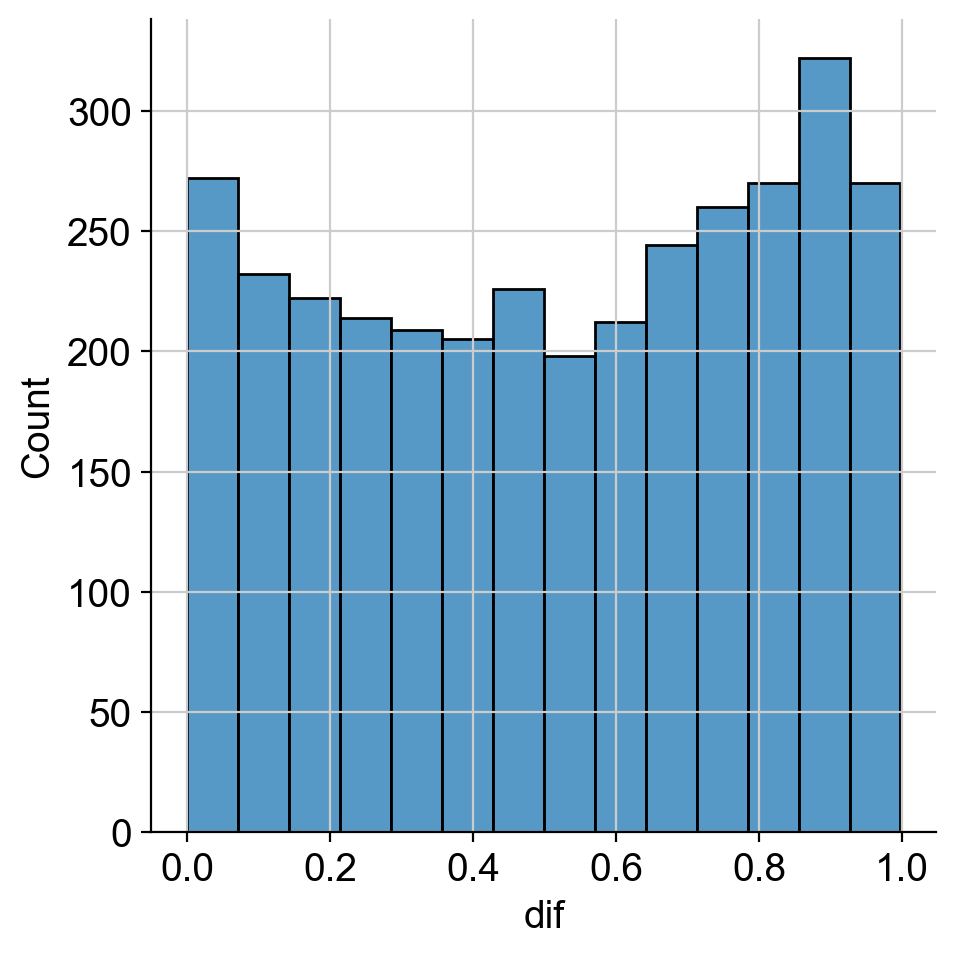

In [102]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [103]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 0.2)]
doublets

,doublet,singlet,prediction,dif
AAACCCAAGACTGAGC-1-ASham_noGFP,0.640072,0.359928,doublet,0.280145
AAACCCAGTAGCGATG-1-ASham_noGFP,0.741868,0.258132,doublet,0.483737
AAACCCAGTCCTCCAT-1-ASham_noGFP,0.979006,0.020994,doublet,0.958012
AAACCCATCTGGCCTT-1-ASham_noGFP,0.935120,0.064880,doublet,0.870240
AAACGAAAGCTGACCC-1-ASham_noGFP,0.982519,0.017481,doublet,0.965038
...,...,...,...,...
TTTGTTGCATAGGTTC-1-ASham_noGFP,0.854360,0.145640,doublet,0.708721
TTTGTTGGTAACAGTA-1-ASham_noGFP,0.666038,0.333962,doublet,0.332077
TTTGTTGGTCCAGCAC-1-ASham_noGFP,0.648383,0.351617,doublet,0.296767
TTTGTTGGTCGAAACG-1-ASham_noGFP,0.934522,0.065478,doublet,0.869044


In [104]:
adata6

AnnData object with n_obs × n_vars = 17202 × 3000
    obs: 'batch', '_scvi_batch', '_scvi_labels'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

In [105]:
adata6 = sc.read_h5ad("ASham_noGFP_adata.h5ad")


In [106]:
adata6.obs

,batch
AAACCCAAGAAATTCG-1-ASham_noGFP,ASham_noGFP
AAACCCAAGACTGAGC-1-ASham_noGFP,ASham_noGFP
AAACCCAAGGATTACA-1-ASham_noGFP,ASham_noGFP
AAACCCAAGGGAGTGG-1-ASham_noGFP,ASham_noGFP
AAACCCAAGTCTTCCC-1-ASham_noGFP,ASham_noGFP
...,...
TTTGTTGTCCGAAATC-1-ASham_noGFP,ASham_noGFP
TTTGTTGTCCGGTAGC-1-ASham_noGFP,ASham_noGFP
TTTGTTGTCGAATCCA-1-ASham_noGFP,ASham_noGFP
TTTGTTGTCTAGACCA-1-ASham_noGFP,ASham_noGFP


In [107]:
adata6.obs['doublet'] = adata6.obs.index.isin(doublets.index) 

In [108]:
adata6.obs

,batch,doublet
AAACCCAAGAAATTCG-1-ASham_noGFP,ASham_noGFP,False
AAACCCAAGACTGAGC-1-ASham_noGFP,ASham_noGFP,True
AAACCCAAGGATTACA-1-ASham_noGFP,ASham_noGFP,False
AAACCCAAGGGAGTGG-1-ASham_noGFP,ASham_noGFP,False
AAACCCAAGTCTTCCC-1-ASham_noGFP,ASham_noGFP,False
...,...,...
TTTGTTGTCCGAAATC-1-ASham_noGFP,ASham_noGFP,False
TTTGTTGTCCGGTAGC-1-ASham_noGFP,ASham_noGFP,True
TTTGTTGTCGAATCCA-1-ASham_noGFP,ASham_noGFP,False
TTTGTTGTCTAGACCA-1-ASham_noGFP,ASham_noGFP,False


In [109]:
adata6 = adata6[~adata6.obs.doublet]
adata6

View of AnnData object with n_obs × n_vars = 14527 × 55402
    obs: 'batch', 'doublet'
    var: 'gene_ids', 'feature_types', 'genome'

In [110]:
# Save the filtered AnnData object
adata6.write("ASham_noGFP_adata_filtered_with_SOLO.h5ad")
adata6

View of AnnData object with n_obs × n_vars = 14527 × 55402
    obs: 'batch', 'doublet'
    var: 'gene_ids', 'feature_types', 'genome'

In [110]:
#sample 7

In [111]:
adata7

AnnData object with n_obs × n_vars = 10595 × 55402
    obs: 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [112]:
sc.pp.filter_genes(adata7, min_cells = 10)
sc.pp.highly_variable_genes(adata7, n_top_genes = 3000, subset = True, flavor = 'seurat_v3')

In [113]:
scvi.model.SCVI.setup_anndata(adata7)
vae = scvi.model.SCVI(adata7)
vae.train()


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█████████████| 400/400 [20:20<00:00,  3.19s/it, v_num=1, train_loss_step=852, train_loss_epoch=823]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████████| 400/400 [20:20<00:00,  3.05s/it, v_num=1, train_loss_step=852, train_loss_epoch=823]


In [114]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 107/400:  27%|██▍      | 107/400 [03:18<09:04,  1.86s/it, v_num=1, train_loss_step=0.274, train_loss_epoch=0.322]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.330. Signaling Trainer to stop.


In [115]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)

df

,doublet,singlet,prediction
AAACCCAAGTGCAGGT-1-AOV_GFP,0.151388,0.848612,singlet
AAACCCACAACAAGAT-1-AOV_GFP,0.028431,0.971569,singlet
AAACCCACAAGCTCTA-1-AOV_GFP,0.609399,0.390601,doublet
AAACCCACACAAGTGG-1-AOV_GFP,0.065306,0.934694,singlet
AAACCCACAGCCCACA-1-AOV_GFP,0.693689,0.306311,doublet
...,...,...,...
TTTGTTGCACCGCTGA-1-AOV_GFP,0.083901,0.916099,singlet
TTTGTTGCATCCGAAT-1-AOV_GFP,0.501580,0.498420,doublet
TTTGTTGGTACCGTCG-1-AOV_GFP,0.444086,0.555914,singlet
TTTGTTGGTGTCGATT-1-AOV_GFP,0.069491,0.930509,singlet


In [116]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,2238,2238
singlet,8357,8357


In [117]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
AAACCCAAGTGCAGGT-1-AOV_GFP,0.151388,0.848612,singlet,-0.697225
AAACCCACAACAAGAT-1-AOV_GFP,0.028431,0.971569,singlet,-0.943137
AAACCCACAAGCTCTA-1-AOV_GFP,0.609399,0.390601,doublet,0.218798
AAACCCACACAAGTGG-1-AOV_GFP,0.065306,0.934694,singlet,-0.869388
AAACCCACAGCCCACA-1-AOV_GFP,0.693689,0.306311,doublet,0.387379
...,...,...,...,...
TTTGTTGCACCGCTGA-1-AOV_GFP,0.083901,0.916099,singlet,-0.832199
TTTGTTGCATCCGAAT-1-AOV_GFP,0.501580,0.498420,doublet,0.003160
TTTGTTGGTACCGTCG-1-AOV_GFP,0.444086,0.555914,singlet,-0.111829
TTTGTTGGTGTCGATT-1-AOV_GFP,0.069491,0.930509,singlet,-0.861019


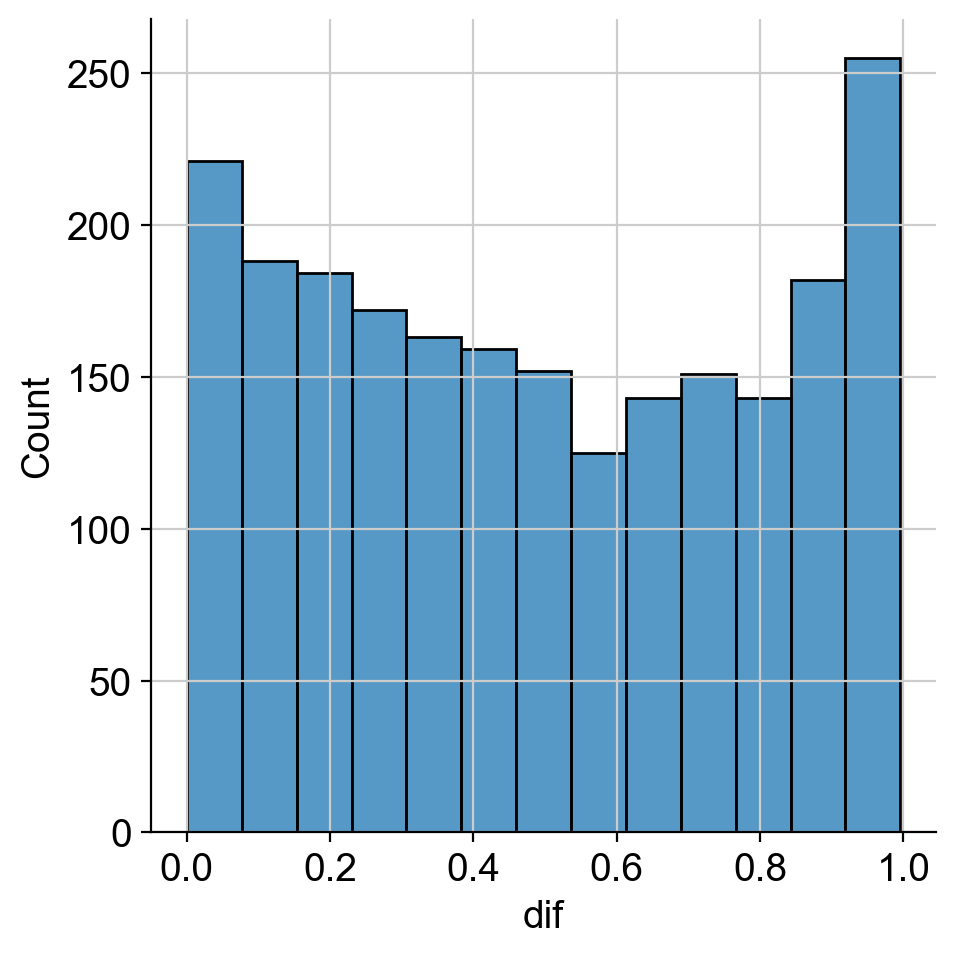

In [118]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [119]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 0.2)]
doublets

,doublet,singlet,prediction,dif
AAACCCACAAGCTCTA-1-AOV_GFP,0.609399,0.390601,doublet,0.218798
AAACCCACAGCCCACA-1-AOV_GFP,0.693689,0.306311,doublet,0.387379
AAACGAACAGAAACCG-1-AOV_GFP,0.712893,0.287107,doublet,0.425787
AAACGAATCTCGCTCA-1-AOV_GFP,0.627046,0.372954,doublet,0.254092
AAACGCTAGATAGCTA-1-AOV_GFP,0.881229,0.118771,doublet,0.762458
...,...,...,...,...
TTTGACTAGTACCATC-1-AOV_GFP,0.620866,0.379134,doublet,0.241731
TTTGGAGAGCAGGCTA-1-AOV_GFP,0.732881,0.267119,doublet,0.465762
TTTGGAGTCTTGGTGA-1-AOV_GFP,0.901689,0.098311,doublet,0.803377
TTTGGTTAGCTTAGTC-1-AOV_GFP,0.762497,0.237502,doublet,0.524995


In [120]:
adata7

AnnData object with n_obs × n_vars = 10595 × 3000
    obs: 'batch', '_scvi_batch', '_scvi_labels'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

In [121]:
adata7 = sc.read_h5ad("AOV_GFP_adata.h5ad")


In [122]:
adata7.obs

,batch
AAACCCAAGTGCAGGT-1-AOV_GFP,AOV_GFP
AAACCCACAACAAGAT-1-AOV_GFP,AOV_GFP
AAACCCACAAGCTCTA-1-AOV_GFP,AOV_GFP
AAACCCACACAAGTGG-1-AOV_GFP,AOV_GFP
AAACCCACAGCCCACA-1-AOV_GFP,AOV_GFP
...,...
TTTGTTGCACCGCTGA-1-AOV_GFP,AOV_GFP
TTTGTTGCATCCGAAT-1-AOV_GFP,AOV_GFP
TTTGTTGGTACCGTCG-1-AOV_GFP,AOV_GFP
TTTGTTGGTGTCGATT-1-AOV_GFP,AOV_GFP


In [123]:
adata7.obs['doublet'] = adata7.obs.index.isin(doublets.index) 

In [124]:
adata7.obs

,batch,doublet
AAACCCAAGTGCAGGT-1-AOV_GFP,AOV_GFP,False
AAACCCACAACAAGAT-1-AOV_GFP,AOV_GFP,False
AAACCCACAAGCTCTA-1-AOV_GFP,AOV_GFP,True
AAACCCACACAAGTGG-1-AOV_GFP,AOV_GFP,False
AAACCCACAGCCCACA-1-AOV_GFP,AOV_GFP,True
...,...,...
TTTGTTGCACCGCTGA-1-AOV_GFP,AOV_GFP,False
TTTGTTGCATCCGAAT-1-AOV_GFP,AOV_GFP,False
TTTGTTGGTACCGTCG-1-AOV_GFP,AOV_GFP,False
TTTGTTGGTGTCGATT-1-AOV_GFP,AOV_GFP,False


In [125]:
adata7 = adata7[~adata7.obs.doublet]
adata7

View of AnnData object with n_obs × n_vars = 8884 × 55402
    obs: 'batch', 'doublet'
    var: 'gene_ids', 'feature_types', 'genome'

In [126]:
# Save the filtered AnnData object
adata7.write("AOV_GFP_adata_filtered_with_SOLO.h5ad")
adata7

View of AnnData object with n_obs × n_vars = 8884 × 55402
    obs: 'batch', 'doublet'
    var: 'gene_ids', 'feature_types', 'genome'

In [126]:
#sample8

In [127]:
adata8

AnnData object with n_obs × n_vars = 13944 × 55402
    obs: 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [128]:
sc.pp.filter_genes(adata8, min_cells = 10)
sc.pp.highly_variable_genes(adata8, n_top_genes = 3000, subset = True, flavor = 'seurat_v3')

In [129]:
scvi.model.SCVI.setup_anndata(adata8)
vae = scvi.model.SCVI(adata8)
vae.train()


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█████████| 400/400 [26:45<00:00,  3.91s/it, v_num=1, train_loss_step=1.35e+3, train_loss_epoch=710]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████| 400/400 [26:45<00:00,  4.01s/it, v_num=1, train_loss_step=1.35e+3, train_loss_epoch=710]


In [130]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 214/400:  54%|████▊    | 214/400 [09:00<07:49,  2.52s/it, v_num=1, train_loss_step=0.181, train_loss_epoch=0.305]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.288. Signaling Trainer to stop.


In [131]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)

df

,doublet,singlet,prediction
AAACCCAAGGCGAACT-1-AOV_noGFP,0.953182,0.046818,doublet
AAACCCAAGGGAGGCA-1-AOV_noGFP,0.058063,0.941937,singlet
AAACCCACAGGCACAA-1-AOV_noGFP,0.561249,0.438751,doublet
AAACCCACATGAGGGT-1-AOV_noGFP,0.074057,0.925943,singlet
AAACCCAGTGCCCTTT-1-AOV_noGFP,0.746136,0.253864,doublet
...,...,...,...
TTTGTTGGTATTGCCA-1-AOV_noGFP,0.000635,0.999365,singlet
TTTGTTGGTGCAACAG-1-AOV_noGFP,0.000418,0.999582,singlet
TTTGTTGGTTAGGGAC-1-AOV_noGFP,0.197876,0.802124,singlet
TTTGTTGTCAGCCTTC-1-AOV_noGFP,0.031299,0.968701,singlet


In [132]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,2760,2760
singlet,11184,11184


In [133]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
AAACCCAAGGCGAACT-1-AOV_noGFP,0.953182,0.046818,doublet,0.906363
AAACCCAAGGGAGGCA-1-AOV_noGFP,0.058063,0.941937,singlet,-0.883874
AAACCCACAGGCACAA-1-AOV_noGFP,0.561249,0.438751,doublet,0.122499
AAACCCACATGAGGGT-1-AOV_noGFP,0.074057,0.925943,singlet,-0.851885
AAACCCAGTGCCCTTT-1-AOV_noGFP,0.746136,0.253864,doublet,0.492272
...,...,...,...,...
TTTGTTGGTATTGCCA-1-AOV_noGFP,0.000635,0.999365,singlet,-0.998730
TTTGTTGGTGCAACAG-1-AOV_noGFP,0.000418,0.999582,singlet,-0.999165
TTTGTTGGTTAGGGAC-1-AOV_noGFP,0.197876,0.802124,singlet,-0.604248
TTTGTTGTCAGCCTTC-1-AOV_noGFP,0.031299,0.968701,singlet,-0.937403


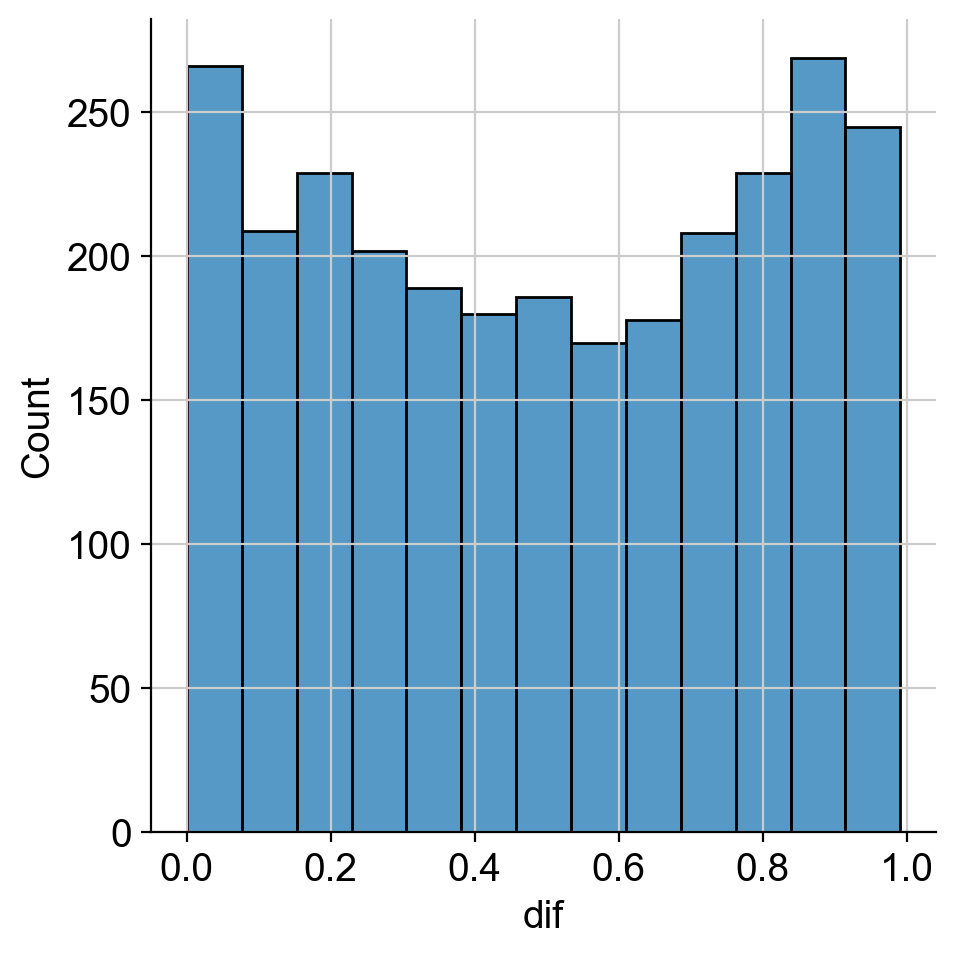

In [134]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [135]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 0.2)]
doublets

,doublet,singlet,prediction,dif
AAACCCAAGGCGAACT-1-AOV_noGFP,0.953182,0.046818,doublet,0.906363
AAACCCAGTGCCCTTT-1-AOV_noGFP,0.746136,0.253864,doublet,0.492272
AAACCCAGTTCCACGG-1-AOV_noGFP,0.629875,0.370125,doublet,0.259750
AAACGAAAGTCATCGT-1-AOV_noGFP,0.917385,0.082615,doublet,0.834770
AAACGAAAGTCATGAA-1-AOV_noGFP,0.787103,0.212897,doublet,0.574206
...,...,...,...,...
TTTGGTTCACCCATAA-1-AOV_noGFP,0.743552,0.256448,doublet,0.487105
TTTGGTTTCTGCATGA-1-AOV_noGFP,0.716025,0.283975,doublet,0.432050
TTTGTTGAGCACCGAA-1-AOV_noGFP,0.847773,0.152227,doublet,0.695546
TTTGTTGCACCAATTG-1-AOV_noGFP,0.950769,0.049231,doublet,0.901539


In [136]:
adata8

AnnData object with n_obs × n_vars = 13944 × 3000
    obs: 'batch', '_scvi_batch', '_scvi_labels'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

In [137]:
adata8 = sc.read_h5ad("AOV_noGFP_adata.h5ad")

In [138]:
adata8.obs

,batch
AAACCCAAGGCGAACT-1-AOV_noGFP,AOV_noGFP
AAACCCAAGGGAGGCA-1-AOV_noGFP,AOV_noGFP
AAACCCACAGGCACAA-1-AOV_noGFP,AOV_noGFP
AAACCCACATGAGGGT-1-AOV_noGFP,AOV_noGFP
AAACCCAGTGCCCTTT-1-AOV_noGFP,AOV_noGFP
...,...
TTTGTTGGTATTGCCA-1-AOV_noGFP,AOV_noGFP
TTTGTTGGTGCAACAG-1-AOV_noGFP,AOV_noGFP
TTTGTTGGTTAGGGAC-1-AOV_noGFP,AOV_noGFP
TTTGTTGTCAGCCTTC-1-AOV_noGFP,AOV_noGFP


In [139]:
adata8.obs['doublet'] = adata8.obs.index.isin(doublets.index) 

In [140]:
adata8.obs

,batch,doublet
AAACCCAAGGCGAACT-1-AOV_noGFP,AOV_noGFP,True
AAACCCAAGGGAGGCA-1-AOV_noGFP,AOV_noGFP,False
AAACCCACAGGCACAA-1-AOV_noGFP,AOV_noGFP,False
AAACCCACATGAGGGT-1-AOV_noGFP,AOV_noGFP,False
AAACCCAGTGCCCTTT-1-AOV_noGFP,AOV_noGFP,True
...,...,...
TTTGTTGGTATTGCCA-1-AOV_noGFP,AOV_noGFP,False
TTTGTTGGTGCAACAG-1-AOV_noGFP,AOV_noGFP,False
TTTGTTGGTTAGGGAC-1-AOV_noGFP,AOV_noGFP,False
TTTGTTGTCAGCCTTC-1-AOV_noGFP,AOV_noGFP,False


In [141]:
adata8 = adata8[~adata8.obs.doublet]
adata8

View of AnnData object with n_obs × n_vars = 11800 × 55402
    obs: 'batch', 'doublet'
    var: 'gene_ids', 'feature_types', 'genome'

In [142]:
# Save the filtered AnnData object
adata8.write("AOV_noGFP_adata_filtered_with_SOLO.h5ad")
adata8

View of AnnData object with n_obs × n_vars = 11800 × 55402
    obs: 'batch', 'doublet'
    var: 'gene_ids', 'feature_types', 'genome'